In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [3]:
myData = pd.read_csv('SVR_Data.csv')
myData

,X,y
0,0.011562,-0.435556
1,0.126902,0.991959
2,0.407993,0.917919
3,0.478538,0.887669
4,0.524606,0.865521
5,0.740627,0.481991
6,0.904990,0.617694
7,0.959010,0.574331
8,1.040530,0.505763
9,1.336384,0.232271


In [4]:
X = myData.iloc[:,0:1].values
X

array([[0.01156173],
       [0.1269017 ],
       [0.40799266],
       [0.47853787],
       [0.52460608],
       [0.74062657],
       [0.90498954],
       [0.95900955],
       [1.04053036],
       [1.33638407],
       [1.42667198],
       [1.50012987],
       [2.01864464],
       [2.15630122],
       [2.44864451],
       [2.48180176],
       [2.58784674],
       [2.66917528],
       [2.80844126],
       [2.878187  ],
       [2.90822982],
       [2.9453425 ],
       [3.03948938],
       [3.05280152],
       [3.19051304],
       [3.20615825],
       [3.24758696],
       [3.28761198],
       [3.3121565 ],
       [3.78229829],
       [3.79670319],
       [3.81418961],
       [3.91577754],
       [4.19800501],
       [4.43766656],
       [4.73658247],
       [4.7563214 ],
       [4.76509583],
       [4.90161237],
       [4.9094606 ]])

In [5]:
y = myData.iloc[:,1:].values
y

array([[-0.43555628],
       [ 0.99195878],
       [ 0.91791912],
       [ 0.88766915],
       [ 0.86552131],
       [ 0.48199076],
       [ 0.61769381],
       [ 0.57433107],
       [ 0.5057628 ],
       [ 0.23227136],
       [ 0.39316594],
       [ 0.07060765],
       [-0.43302705],
       [-0.55262025],
       [-0.76936607],
       [ 0.2983436 ],
       [-0.85056061],
       [-0.89047089],
       [-0.94501646],
       [-0.96550885],
       [-0.79453848],
       [-0.98080466],
       [-0.99479199],
       [-0.99606066],
       [-0.99880364],
       [ 0.34270123],
       [-0.99438786],
       [-0.98935811],
       [-0.98548922],
       [-0.80167415],
       [ 0.12846622],
       [-0.78220635],
       [-0.71499115],
       [-0.49199863],
       [-0.27127978],
       [ 0.52634385],
       [ 0.04391828],
       [ 0.05268245],
       [ 0.1880962 ],
       [ 0.19579847]])

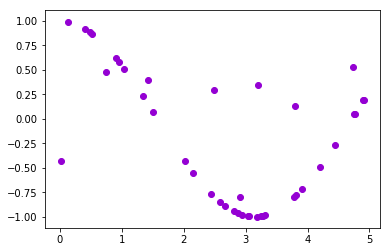

In [6]:
plt.scatter(X, y, color='darkviolet', label='data')
plt.show()

In [7]:
# Feature Scaling SVR model don't have inbuilt feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(with_mean=True, with_std=True)
X= sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [15]:
# Fit regression model
svr_rbf = SVR(kernel='rbf',gamma=10)
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=4)
y_pred_rbf = svr_rbf.fit(X, y).predict(X)
y_pred_lin = svr_lin.fit(X, y).predict(X)
y_pred_poly = svr_poly.fit(X, y).predict(X)

C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


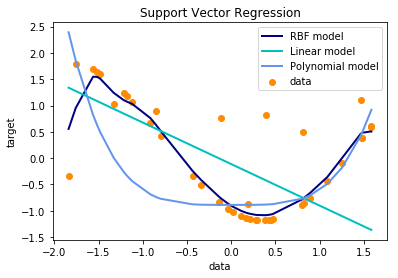

In [16]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_pred_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_pred_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_pred_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()